In [1]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = '/e/DOCS/20_non/05-map-data/data/codepo_aug2020/Data/CSV/'
all_files = os.listdir(PATH)

all_dataframes = []
for file in all_files:
    df = pd.read_csv(PATH + file, header=None)
    all_dataframes.append(df)
df_raw = pd.concat(all_dataframes, ignore_index=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723637 entries, 0 to 1723636
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       object 
 5   5       object 
 6   6       object 
 7   7       object 
 8   8       object 
 9   9       object 
dtypes: float64(3), object(7)
memory usage: 131.5+ MB


In [3]:
df = df_raw[df_raw[1] != 90].copy()
df[1].value_counts()

10.0    1704025
50.0       3852
20.0         70
60.0         52
30.0         32
Name: 1, dtype: int64

In [4]:
def space_postcode(txt):
    '''adds space into postcode
    example YO901WR -> YO90 1WR'''
    return txt[0:4] + ' ' + txt[4:]
space_postcode(df.loc[1722982, 0])

'YO90 1WR'

In [5]:
has_space = df[0].str.contains(' ')
df.loc[~has_space, 0] = df.loc[~has_space, 0].map(space_postcode)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9
0,AB10 1AB,10.0,394235.0,806529.0,S92000003,NaN,S08000020,NaN,S12000033,S13002842
1,AB10 1AF,10.0,394181.0,806429.0,S92000003,NaN,S08000020,NaN,S12000033,S13002842
2,AB10 1AG,10.0,394230.0,806469.0,S92000003,NaN,S08000020,NaN,S12000033,S13002842
3,AB10 1AH,10.0,394371.0,806359.0,S92000003,NaN,S08000020,NaN,S12000033,S13002842
4,AB10 1AL,10.0,394296.0,806581.0,S92000003,NaN,S08000020,NaN,S12000033,S13002842
...,...,...,...,...,...,...,...,...,...,...
1723632,ZE3 9JU,10.0,438872.0,1111807.0,S92000003,NaN,S08000026,NaN,S12000027,S13002776
1723633,ZE3 9JW,10.0,438975.0,1110038.0,S92000003,NaN,S08000026,NaN,S12000027,S13002776
1723634,ZE3 9JX,10.0,438872.0,1110219.0,S92000003,NaN,S08000026,NaN,S12000027,S13002776
1723635,ZE3 9JY,10.0,438498.0,1112029.0,S92000003,NaN,S08000026,NaN,S12000027,S13002776


In [7]:
PATH2 = '/e/DOCS/20_non/05-map-data/data/'
dfmot_r = pd.read_csv(PATH2 + 'mot-vehicle-testing-stations.csv')
dfmot_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23224 entries, 0 to 23223
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   VTS Site Number       23224 non-null  object
 1   Trading Name          23208 non-null  object
 2   VTS Address Line 1    23224 non-null  object
 3   VTS Address Line 2    15479 non-null  object
 4   VTS Address Line 3    5454 non-null   object
 5   VTS Address Line 14   23224 non-null  object
 6   VTS Postcode          23224 non-null  object
 7   VTS Telephone Number  23224 non-null  object
 8   1                     23224 non-null  int64 
 9   2                     23224 non-null  int64 
 10  3                     23224 non-null  int64 
 11  4                     23224 non-null  int64 
 12  5                     23224 non-null  int64 
 13  7                     23224 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.5+ MB


In [8]:
to_keep = ['Trading Name', 'VTS Address Line 1',
       'VTS Address Line 2', 'VTS Address Line 3', 'VTS Address Line 14',
       'VTS Postcode']
dfmot = dfmot_r[to_keep].copy()
dfmot.columns = ['Name', 1, 2, 3, 4, 'Postcode']
dfmot

,Name,1,2,3,4,Postcode
0,CARDEN MOTOR COMPANY,80A BROOMHILL ROAD,NaN,NaN,ABERDEEN,AB10 6HU
1,ALAN J ROSS MOTOR ENGINEERS LIMITED,21 ASHLEY PARK LANE,NaN,NaN,ABERDEEN,AB10 6RZ
2,ALBYN GARAGE ABERDEEN LTD,25 ALBYN LANE,NaN,NaN,ABERDEEN,AB10 6XF
3,KENWAY TYRES LTD,26 MEARNS STREET,NaN,NaN,ABERDEEN,AB11 5AT
4,DOD SIMS GARAGE,29 COTTON STREET,NaN,NaN,ABERDEEN,AB11 5EE
...,...,...,...,...,...,...
23219,HENDERSONS GARAGE,HENDERSON'S GARAGE,SCOUSBURGH DUNROSSNESS,NaN,SHETLAND,ZE2 9JE
23220,AITH GARAGE LTD,AITH GARAGE,AITH,BIXTER,SHETLAND,ZE2 9NB
23221,BRAE GARAGE (SHETLAND) LTD,BRAE,NaN,NaN,BRAE,ZE2 9QJ
23222,SHETLAND MOT & REPAIR,BALLISTER,TINGWALL,NaN,SHETLAND,ZE2 9SB


In [9]:
def join_address(row):
    '''Joins separate address fields into single field
    with commas between parts'''
    address = ''
    for value in row:
        if value is not np.nan:
            address += value + ', '
    return address[:-2]

out = [join_address(row[1:5]) for _, row in dfmot.iterrows()]
dfmot['Address'] = out
dfmot.drop(columns=[1, 2, 3, 4], inplace=True)

In [10]:
dfmot

,Name,Postcode,Address
0,CARDEN MOTOR COMPANY,AB10 6HU,"80A BROOMHILL ROAD, ABERDEEN"
1,ALAN J ROSS MOTOR ENGINEERS LIMITED,AB10 6RZ,"21 ASHLEY PARK LANE, ABERDEEN"
2,ALBYN GARAGE ABERDEEN LTD,AB10 6XF,"25 ALBYN LANE, ABERDEEN"
3,KENWAY TYRES LTD,AB11 5AT,"26 MEARNS STREET, ABERDEEN"
4,DOD SIMS GARAGE,AB11 5EE,"29 COTTON STREET, ABERDEEN"
...,...,...,...
23219,HENDERSONS GARAGE,ZE2 9JE,"HENDERSON'S GARAGE, SCOUSBURGH DUNROSSNESS, SH..."
23220,AITH GARAGE LTD,ZE2 9NB,"AITH GARAGE, AITH, BIXTER, SHETLAND"
23221,BRAE GARAGE (SHETLAND) LTD,ZE2 9QJ,"BRAE, BRAE"
23222,SHETLAND MOT & REPAIR,ZE2 9SB,"BALLISTER, TINGWALL, SHETLAND"


In [11]:
easting = dict(zip(df[0], df[2]))
northing = dict(zip(df[0], df[3]))

dfmot['Easting'] = dfmot['Postcode'].map(easting)
dfmot['Northing'] = dfmot['Postcode'].map(northing)
dfmot

,Name,Postcode,Address,Easting,Northing
0,CARDEN MOTOR COMPANY,AB10 6HU,"80A BROOMHILL ROAD, ABERDEEN",392869.0,804845.0
1,ALAN J ROSS MOTOR ENGINEERS LIMITED,AB10 6RZ,"21 ASHLEY PARK LANE, ABERDEEN",392567.0,805084.0
2,ALBYN GARAGE ABERDEEN LTD,AB10 6XF,"25 ALBYN LANE, ABERDEEN",392709.0,805702.0
3,KENWAY TYRES LTD,AB11 5AT,"26 MEARNS STREET, ABERDEEN",394698.0,806285.0
4,DOD SIMS GARAGE,AB11 5EE,"29 COTTON STREET, ABERDEEN",395049.0,806673.0
...,...,...,...,...,...
23219,HENDERSONS GARAGE,ZE2 9JE,"HENDERSON'S GARAGE, SCOUSBURGH DUNROSSNESS, SH...",437674.0,1117312.0
23220,AITH GARAGE LTD,ZE2 9NB,"AITH GARAGE, AITH, BIXTER, SHETLAND",434329.0,1155640.0
23221,BRAE GARAGE (SHETLAND) LTD,ZE2 9QJ,"BRAE, BRAE",436046.0,1167312.0
23222,SHETLAND MOT & REPAIR,ZE2 9SB,"BALLISTER, TINGWALL, SHETLAND",442449.0,1144102.0


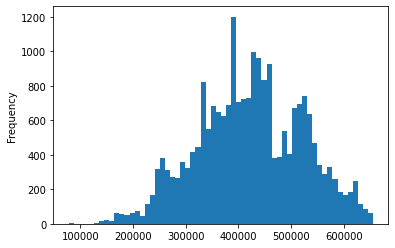

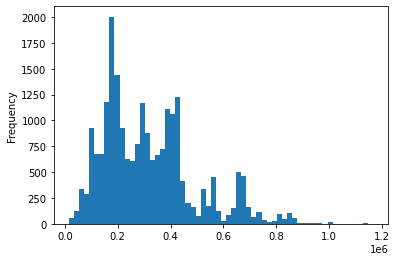

78147.0
14397.0


In [12]:
dfmot['Easting'].plot.hist(bins=60)
plt.show()
dfmot['Northing'].plot.hist(bins=60)
plt.show()
print(dfmot['Easting'].min())
print(dfmot['Northing'].min())

In [13]:
dfmot.isnull().sum()

Name          16
Postcode       0
Address        0
Easting     1150
Northing    1150
dtype: int64

In [14]:
dfmot[dfmot['Name'].isnull()]

,Name,Postcode,Address,Easting,Northing
4205,NaN,CR0 4XY,"UNIT E, PIONEERS INDUSTRIAL PARK, BEDDINGTON, ...",530201.0,166364.0
4632,NaN,CV34 5JB,"UNITS 3 & 4, NELSON LANE, WARWICK",429099.0,265832.0
6636,NaN,EH11 4YY,"EDINBURGH MAIL CENTRE, 11 CULTINS ROAD, EDINBURGH",318539.0,670786.0
6679,NaN,EH15 3HR,"7 WHITEHILL ROAD, FORT KINNAIRD, EDINBURGH",331060.0,671479.0
8166,NaN,GL51 9PA,"UNIT 2A, BLOCK A, UPPERFIELD ROAD, CHELTENHAM",393337.0,224119.0
8246,NaN,GU1 1AE,"UNIT 4, DENNIS WAY, SLYFIELD INDUSTRIAL ESTATE...",500258.0,152632.0
9081,NaN,HR9 7AS,"OVER ROSS GARAGE, OVER ROSS STREET, ROSS ON WY...",360159.0,224541.0
10046,NaN,KT12 1LN,"73 HERSHAM ROAD, WALTON ON THAMES",510772.0,165441.0
10341,NaN,KY7 4NY,"UNIT P, EASTFIELD INDUSTRIAL ESTATE, BAIRD ROA...",328898.0,700062.0
16312,NaN,PO19 1AA,"80 BASIN ROAD, CHICHESTER",485921.0,104178.0


In [16]:
dfmot = dfmot[~dfmot['Easting'].isnull()]
dfmot.fillna('-na-', inplace=True)
dfmot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22074 entries, 0 to 23223
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      22074 non-null  object 
 1   Postcode  22074 non-null  object 
 2   Address   22074 non-null  object 
 3   Easting   22074 non-null  float64
 4   Northing  22074 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.0+ MB


In [25]:
out = dfmot.to_json(orient='records', indent=2)
print(out[0:500])

[
  {
    "Name":"CARDEN MOTOR COMPANY",
    "Postcode":"AB10 6HU",
    "Address":"80A BROOMHILL ROAD, ABERDEEN",
    "Easting":392869.0,
    "Northing":804845.0
  },
  {
    "Name":"ALAN J ROSS MOTOR ENGINEERS LIMITED",
    "Postcode":"AB10 6RZ",
    "Address":"21 ASHLEY PARK LANE, ABERDEEN",
    "Easting":392567.0,
    "Northing":805084.0
  },
  {
    "Name":"ALBYN GARAGE ABERDEEN LTD",
    "Postcode":"AB10 6XF",
    "Address":"25 ALBYN LANE, ABERDEEN",
    "Easting":392709.0,
    "Northing":8
